# Advanced example

This guide shows how to analyze images of a real dataset jointly. The dataset consists of a MALDI and optical images of mouse urinary bladder, and can be downloaded from PRIDE (dataset id [PXD001283](https://www.ebi.ac.uk/pride/archive/projects/PXD001283)).

The dataset can be downloaded by running:

``` bash
    cd data/Mouse_Urinary_Bladder_PXD001283/
    python download.py
```

After completion (might take a while), the three following downloaded files should be located in the ``data/Mouse_Urinary_Bladder_PXD001283``: ms_image.imzML, ms_image.imzML, and optical_image.tiff.

We aim at finding the spatial correlations between the ion images in MALDI and the optical image.

Let's import the necessary modules and define some utility functions:

In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import string
import SimpleITK as sitk

rootpath = "../../"
imagepath = "data/Mouse_Urinary_Bladder_PXD001283/"
sys.path.append(os.path.join(os.path.dirname(os.path.abspath("__file__")), rootpath))

def display_image(image):
    plt.axis("off")
    plt.imshow(image, cmap="gray")
    plt.show()

def display_images(*images):
    fig, ax = plt.subplots(1, len(images))
    for i in range(len(images)):
        ax[i].axis('off')
        ax[i].imshow(images[i], cmap="gray")
        ax[i].text(0.4, -0.2, "(" + string.ascii_lowercase[i] + ")", transform=ax[i].transAxes, size=18)
    plt.show()

## Input, Visualization

The data is available in the `data` directory. 
First, read the data and display the spectrum of the first pixel:

(34840, 2)


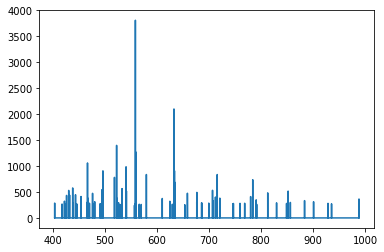

In [18]:
import esmraldi.imzmlio as io

imzml = io.open_imzml(rootpath + imagepath + "ms_image.imzML")
spectra = io.get_spectra(imzml)

print(spectra.shape)
mz_first, intensities_first = spectra[0, 0], spectra[0, 1]
plt.plot(mz_first, intensities_first)
plt.show()

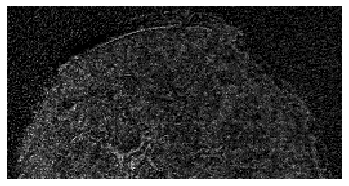

In [3]:
image = io.get_image(imzml, 557.14, 0.25)
display_image(image)

In [19]:
import esmraldi.spectraprocessing as sp

spectra = sp.same_mz_axis(spectra, tol=1)
mzs = spectra[0, 0]
print(spectra[0, 0])

[404.09271947 404.09578822 404.09885701 ... 988.2089146  988.2206505
 988.23238661]


KeyboardInterrupt: 

In [7]:
mzs = spectra[0, 0]
print(mzs)
spectra_realign = sp.realign_mzs(spectra, mzs, nb_occurrence=2, step=0.5)
print(spectra_realign.shape)

[404.09271947 404.09578822 404.09885701 ... 400.12373166 400.12675531
 400.129779  ]


TypeError: 'numpy.float64' object is not iterable